### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
book=pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


### Data Understanding

In [3]:
book.shape

(2000, 11)

In [4]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [5]:
book.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [6]:
book.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [7]:
for i in book.columns:
    print(i)
    print(book[i].value_counts())

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64
YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64
CookBks
0    1138
1     862
Name: CookBks, dtype: int64
DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64
RefBks
0    1571
1     429
Name: RefBks, dtype: int64
ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64
GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64
ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64
ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64
ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64
Florence
0    1783
1     217
Name: Florence, dtype: int64


### Model Building

### Updating minimum support

#### Model 1 : min_support = 0.03, max_len=None, metric='confidence', min_threshold=0.8

In [8]:
frequent_itemsets1=apriori(df=book,min_support=0.03,use_colnames=True,max_len=None)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
176,0.0535,"(ArtBks, ChildBks, DoItYBks, CookBks, GeogBks)"
177,0.0405,"(ArtBks, RefBks, ChildBks, CookBks, GeogBks)"
178,0.0300,"(ArtBks, ChildBks, CookBks, GeogBks, ItalCook)"
179,0.0370,"(ArtBks, DoItYBks, CookBks, GeogBks, YouthBks)"


In [9]:
best_associates_book1=association_rules(df=frequent_itemsets1,metric='confidence',min_threshold=0.8)
best_associates_book1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalArt),(CookBks),0.0485,0.4310,0.0410,0.845361,1.961394,0.020096,3.679533
2,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
3,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
4,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.4230,0.0950,0.822511,1.944470,0.046143,3.250902
...,...,...,...,...,...,...,...,...,...
131,"(ArtBks, GeogBks, CookBks, ItalCook)",(ChildBks),0.0360,0.4230,0.0300,0.833333,1.970055,0.014772,3.462000
132,"(ArtBks, GeogBks, ItalCook)","(CookBks, ChildBks)",0.0360,0.2560,0.0300,0.833333,3.255208,0.020784,4.464000
133,"(ArtBks, DoItYBks, YouthBks, GeogBks)",(CookBks),0.0395,0.4310,0.0370,0.936709,2.173338,0.019975,8.990200
134,"(ArtBks, ChildBks, DoItYBks, GeogBks, YouthBks)",(CookBks),0.0335,0.4310,0.0310,0.925373,2.147037,0.016561,7.624600


#### Model 2 : min_support = 0.05, max_len=None,metric='confidence',min_threshold=0.8

In [10]:
frequent_itemsets2=apriori(df=book,min_support=0.05,use_colnames=True,max_len=None)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, GeogBks, YouthBks, CookBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(ChildBks, DoItYBks, CookBks, GeogBks, YouthBks)"


In [11]:
best_associates_book2=association_rules(df=frequent_itemsets2,metric='confidence',min_threshold=0.8)
best_associates_book2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(GeogBks, YouthBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
...,...,...,...,...,...,...,...,...,...
57,"(ArtBks, DoItYBks, GeogBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(DoItYBks, YouthBks, GeogBks, ChildBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
59,"(DoItYBks, YouthBks, GeogBks, CookBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
60,"(ArtBks, DoItYBks, GeogBks, ChildBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583


#### Model 3 : min_support = 0.07, max_len=None,metric='confidence',min_threshold=0.8

In [12]:
frequent_itemsets3=apriori(df=book,min_support=0.07,use_colnames=True,max_len=None)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(DoItYBks, CookBks, RefBks, ChildBks)"
62,0.0820,"(ArtBks, DoItYBks, CookBks, ChildBks)"
63,0.0890,"(DoItYBks, GeogBks, CookBks, ChildBks)"
64,0.0785,"(GeogBks, CookBks, RefBks, ChildBks)"


In [13]:
best_associates_book3=association_rules(df=frequent_itemsets3,metric='confidence',min_threshold=0.8)
best_associates_book3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(GeogBks, YouthBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
5,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
6,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
7,"(DoItYBks, RefBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323
8,"(ArtBks, RefBks)",(ChildBks),0.0895,0.423,0.0760,0.849162,2.007475,0.038142,3.825296
9,"(GeogBks, RefBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152


#### Model 4 : min_support = 0.1, max_len=None,metric='confidence',min_threshold=0.8

In [14]:
frequent_itemsets4=apriori(df=book,min_support=0.1,use_colnames=True,max_len=None)
frequent_itemsets4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [15]:
best_associates_book4=association_rules(df=frequent_itemsets4,metric='confidence',min_threshold=0.8)
best_associates_book4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
2,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
3,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
4,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
5,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


### Updating maximum length

#### Model 5 : min_support = 0.05, max_len=5,metric='confidence',min_threshold=0.8

In [16]:
frequent_itemsets5=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets5

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, GeogBks, YouthBks, CookBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(ChildBks, DoItYBks, CookBks, GeogBks, YouthBks)"


In [17]:
best_associates_book5=association_rules(df=frequent_itemsets5,metric='confidence',min_threshold=0.8)
best_associates_book5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(GeogBks, YouthBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
...,...,...,...,...,...,...,...,...,...
57,"(ArtBks, DoItYBks, GeogBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(DoItYBks, YouthBks, GeogBks, ChildBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
59,"(DoItYBks, YouthBks, GeogBks, CookBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
60,"(ArtBks, DoItYBks, GeogBks, ChildBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583


#### Model 6 : min_support = 0.05, max_len=4,metric='confidence',min_threshold=0.8

In [18]:
frequent_itemsets6=apriori(df=book,min_support=0.05,use_colnames=True,max_len=4)
frequent_itemsets6

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
93,0.0595,"(ArtBks, DoItYBks, GeogBks, ChildBks)"
94,0.0525,"(ArtBks, DoItYBks, YouthBks, CookBks)"
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, GeogBks, YouthBks, CookBks)"


In [19]:
best_associates_book6=association_rules(df=frequent_itemsets6,metric='confidence',min_threshold=0.8)
best_associates_book6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(GeogBks, YouthBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
5,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
6,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
7,"(DoItYBks, RefBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323
8,"(ArtBks, RefBks)",(ChildBks),0.0895,0.423,0.0760,0.849162,2.007475,0.038142,3.825296
9,"(GeogBks, RefBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152


#### Model 7 : min_support = 0.05, max_len=3,metric='confidence',min_threshold=0.8

In [20]:
frequent_itemsets7=apriori(df=book,min_support=0.05,use_colnames=True,max_len=3)
frequent_itemsets7

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
71,0.0640,"(GeogBks, CookBks, ItalCook)"
72,0.0535,"(ArtBks, DoItYBks, RefBks)"
73,0.0585,"(DoItYBks, GeogBks, RefBks)"
74,0.0730,"(ArtBks, DoItYBks, GeogBks)"


In [21]:
best_associates_book7=association_rules(df=frequent_itemsets7,metric='confidence',min_threshold=0.8)
best_associates_book7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(GeogBks, YouthBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
5,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
6,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
7,"(DoItYBks, RefBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323
8,"(ArtBks, RefBks)",(ChildBks),0.0895,0.423,0.0760,0.849162,2.007475,0.038142,3.825296
9,"(GeogBks, RefBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152


#### Model 8 : min_support = 0.05, max_len=2,metric='confidence',min_threshold=0.8

In [22]:
frequent_itemsets8=apriori(df=book,min_support=0.05,use_colnames=True,max_len=2)
frequent_itemsets8

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [23]:
best_associates_book8=association_rules(df=frequent_itemsets8,metric='confidence',min_threshold=0.8)
best_associates_book8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf


### Updating minimum threshold for the metric 'Confidence'

#### Model 9 : min_support = 0.05, max_len=5,metric='confidence',min_threshold=0.8

In [24]:
frequent_itemsets9=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets9

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, GeogBks, YouthBks, CookBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(ChildBks, DoItYBks, CookBks, GeogBks, YouthBks)"


In [25]:
best_associates_book9=association_rules(df=frequent_itemsets9,metric='confidence',min_threshold=0.8)
best_associates_book9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(DoItYBks, YouthBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(GeogBks, YouthBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
...,...,...,...,...,...,...,...,...,...
57,"(ArtBks, DoItYBks, GeogBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(DoItYBks, YouthBks, GeogBks, ChildBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
59,"(DoItYBks, YouthBks, GeogBks, CookBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
60,"(ArtBks, DoItYBks, GeogBks, ChildBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583


#### Model 10 : min_support = 0.05, max_len=5,metric='confidence',min_threshold=0.7

In [26]:
frequent_itemsets10=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets10

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, GeogBks, YouthBks, CookBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(ChildBks, DoItYBks, CookBks, GeogBks, YouthBks)"


In [27]:
best_associates_book10=association_rules(df=frequent_itemsets10,metric='confidence',min_threshold=0.7)
best_associates_book10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
...,...,...,...,...,...,...,...,...,...
82,"(DoItYBks, YouthBks, GeogBks, CookBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
83,"(DoItYBks, YouthBks, GeogBks)","(CookBks, ChildBks)",0.0680,0.256,0.0510,0.750000,2.929687,0.033592,2.976000
84,"(ArtBks, DoItYBks, GeogBks, ChildBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
85,"(ArtBks, DoItYBks, GeogBks, CookBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


#### Model 11 : min_support = 0.05, max_len=5,metric='confidence',min_threshold=0.6

In [28]:
frequent_itemsets11=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets11

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, GeogBks, YouthBks, CookBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(ChildBks, DoItYBks, CookBks, GeogBks, YouthBks)"


In [29]:
best_associates_book11=association_rules(df=frequent_itemsets11,metric='confidence',min_threshold=0.6)
best_associates_book11

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
130,"(ArtBks, DoItYBks, GeogBks, ChildBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
131,"(ArtBks, GeogBks, CookBks, ChildBks)",(DoItYBks),0.0835,0.282,0.0535,0.640719,2.272052,0.029953,1.998433
132,"(ArtBks, DoItYBks, GeogBks, CookBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304
133,"(DoItYBks, GeogBks, CookBks, ChildBks)",(ArtBks),0.0890,0.241,0.0535,0.601124,2.494289,0.032051,1.902845


### Updating metric as support and updating minimum threshold of support

#### Model 12 : min_support = 0.05, max_len=None,metric='support',min_threshold=0.07

In [30]:
frequent_itemsets12=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets12

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, GeogBks, YouthBks, CookBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(ChildBks, DoItYBks, CookBks, GeogBks, YouthBks)"


In [31]:
best_associates_book12=association_rules(df=frequent_itemsets12,metric='support',min_threshold=0.07)
best_associates_book12

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
301,"(CookBks, ChildBks)","(ArtBks, GeogBks)",0.2560,0.1275,0.0835,0.326172,2.558211,0.050860,1.294841
302,(ArtBks),"(GeogBks, CookBks, ChildBks)",0.2410,0.1495,0.0835,0.346473,2.317545,0.047471,1.301400
303,(GeogBks),"(ArtBks, CookBks, ChildBks)",0.2760,0.1265,0.0835,0.302536,2.391591,0.048586,1.252395
304,(CookBks),"(ArtBks, GeogBks, ChildBks)",0.4310,0.1020,0.0835,0.193735,1.899368,0.039538,1.113778


#### Model 13 : min_support = 0.05, max_len=5,metric='support',min_threshold=0.1

In [32]:
frequent_itemsets13=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets13

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, GeogBks, YouthBks, CookBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(ChildBks, DoItYBks, CookBks, GeogBks, YouthBks)"


In [33]:
best_associates_book13=association_rules(df=frequent_itemsets13,metric='support',min_threshold=0.1)
best_associates_book13

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


#### Model 14 : min_support = 0.05, max_len=5,metric='support',min_threshold=0.2

In [34]:
frequent_itemsets14=apriori(df=book,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets14

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, GeogBks, YouthBks, CookBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(ChildBks, DoItYBks, CookBks, GeogBks, YouthBks)"


In [35]:
best_associates_book14=association_rules(df=frequent_itemsets14,metric='support',min_threshold=0.2)
best_associates_book14

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


### Data Visualization

In [36]:
print(frequent_itemsets1.shape)
print(frequent_itemsets2.shape)
print(frequent_itemsets3.shape)
print(frequent_itemsets4.shape)
print(frequent_itemsets5.shape)
print(frequent_itemsets6.shape)
print(frequent_itemsets7.shape)
print(frequent_itemsets8.shape)
print(frequent_itemsets9.shape)
print(frequent_itemsets10.shape)
print(frequent_itemsets11.shape)
print(frequent_itemsets12.shape)
print(frequent_itemsets13.shape)
print(frequent_itemsets14.shape)

(181, 2)
(100, 2)
(66, 2)
(39, 2)
(100, 2)
(98, 2)
(76, 2)
(36, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)


In [37]:
print(best_associates_book1.shape)
print(best_associates_book2.shape)
print(best_associates_book3.shape)
print(best_associates_book4.shape)
print(best_associates_book5.shape)
print(best_associates_book6.shape)
print(best_associates_book7.shape)
print(best_associates_book8.shape)
print(best_associates_book9.shape)
print(best_associates_book10.shape)
print(best_associates_book11.shape)
print(best_associates_book12.shape)
print(best_associates_book13.shape)
print(best_associates_book14.shape)

(136, 9)
(62, 9)
(33, 9)
(6, 9)
(62, 9)
(58, 9)
(24, 9)
(1, 9)
(62, 9)
(87, 9)
(135, 9)
(306, 9)
(100, 9)
(2, 9)


### Displot

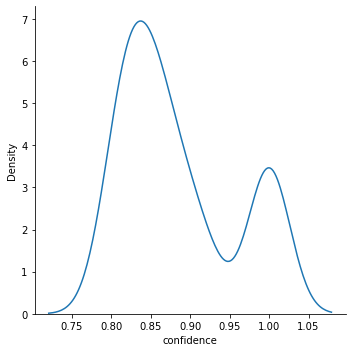

In [38]:
sns.displot(data=best_associates_book1,x='confidence',kind='kde')
plt.show()

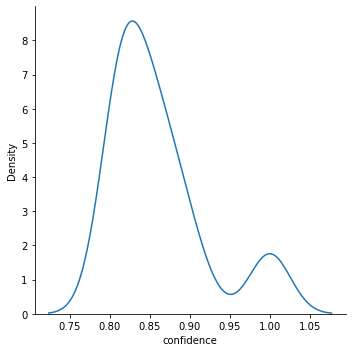

In [39]:
sns.displot(data=best_associates_book2,x='confidence',kind='kde')
plt.show()

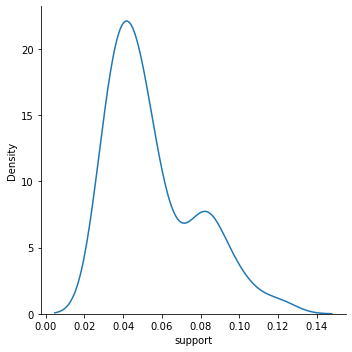

In [40]:
sns.displot(data=best_associates_book1,x='support',kind='kde')
plt.show()

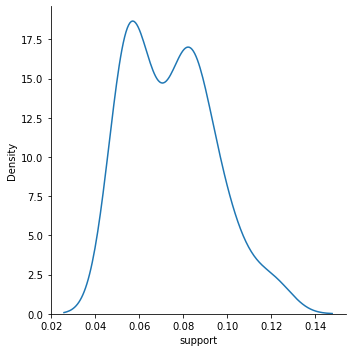

In [41]:
sns.displot(data=best_associates_book2,x='support',kind='kde')
plt.show()

### Heatmap of Confidence and Support

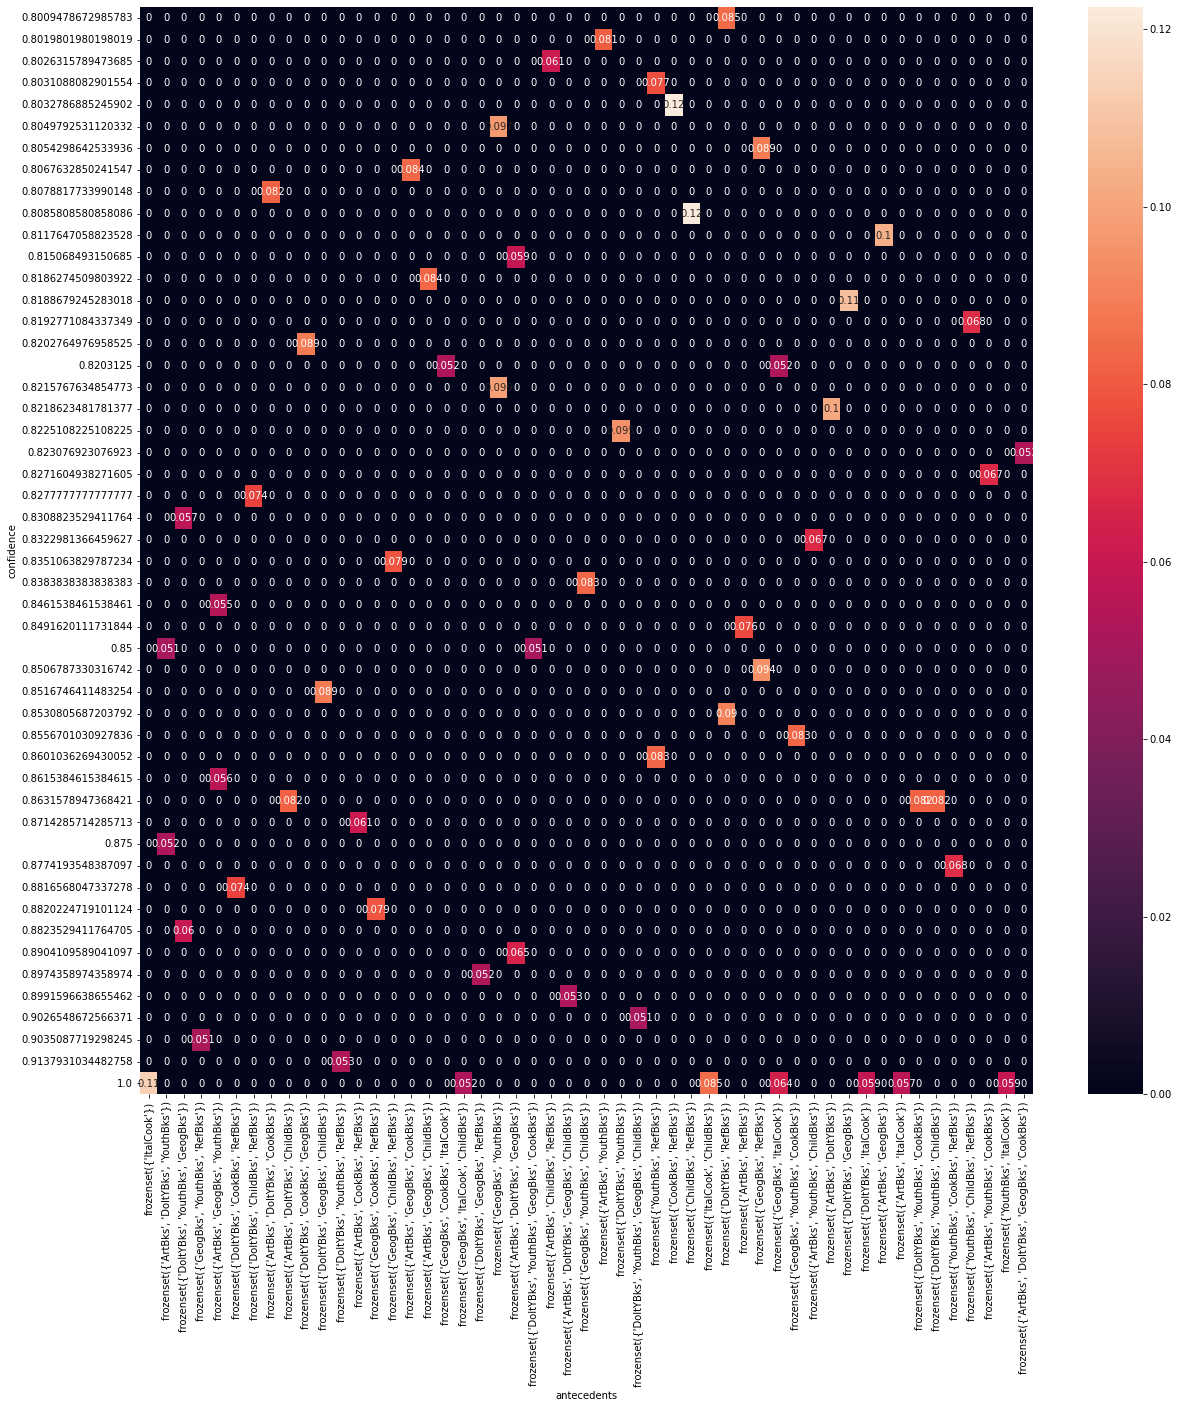

In [42]:
plt.figure(figsize=(20,20))
pivot1=pd.pivot_table(data=best_associates_book5,index='confidence',columns='antecedents',values='support').fillna(0)
sns.heatmap(pivot1,annot=True)
plt.show()

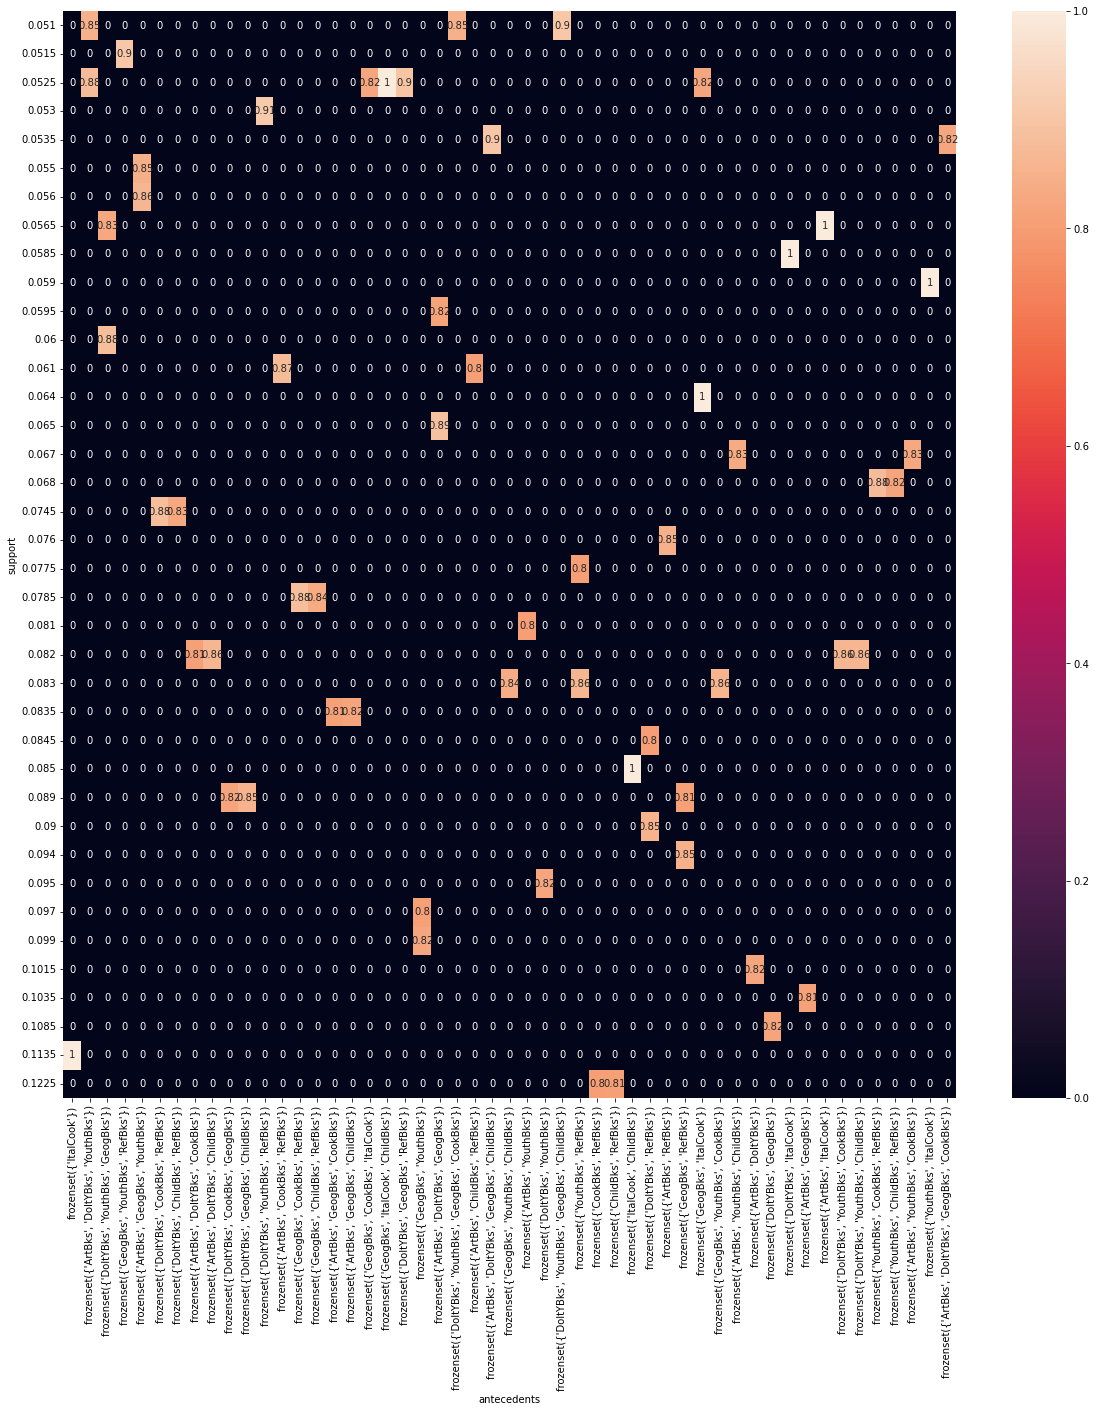

In [43]:
plt.figure(figsize=(20,20))
pivot2=pd.pivot_table(data=best_associates_book5,index='support',columns='antecedents',values='confidence').fillna(0)
sns.heatmap(pivot2,annot=True)
plt.show()

### Updating minimum support

In [44]:
min_support=[0.03,0.05,0.07,0.1]
no_of_frequent_itemsets = [181,100,66,39]
no_of_best_associates = [136,62,33,6]

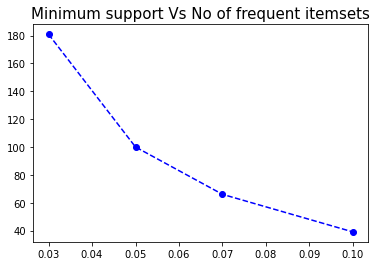

In [45]:
plt.plot(min_support,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('Minimum support Vs No of frequent itemsets',fontsize=15)
plt.show()

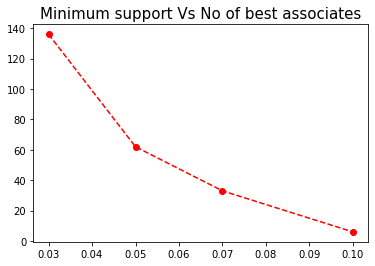

In [46]:
plt.plot(min_support,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Minimum support Vs No of best associates',fontsize=15)
plt.show()

##### As minimum support increases from 0.03 till 0.1, No. of Itemsets and also No. of best associates decreases

### Updating maximum length

In [47]:
max_length=[5,4,3,2]
no_of_frequent_itemsets = [100,98,76,36]
no_of_best_associates = [62,58,24,1]

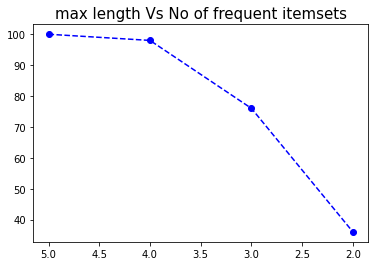

In [48]:
plt.plot(max_length,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('max length Vs No of frequent itemsets',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

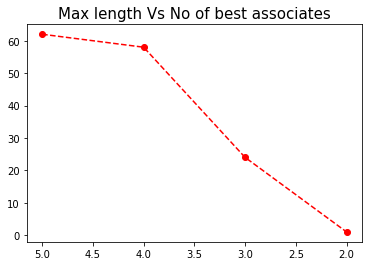

In [49]:
plt.plot(max_length,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Max length Vs No of best associates',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

##### As maximum length decreases from 5 till 2, No. of Itemsets and also No. of best associates decreases

### Updating Minimum threshold of metric 'Confidence'

In [50]:
minimum_threshold =[0.8,0.7,0.6]
no_of_frequent_itemsets = [100,100,100]
no_of_best_associates = [62,87,135]

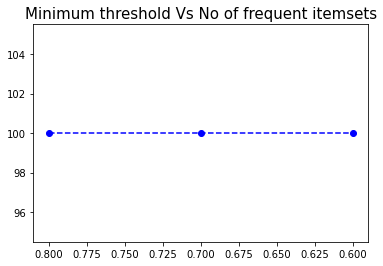

In [51]:
plt.plot(minimum_threshold,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('Minimum threshold Vs No of frequent itemsets',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

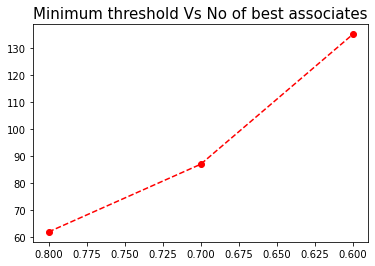

In [52]:
plt.plot(minimum_threshold,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Minimum threshold Vs No of best associates',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

##### As Minimum length for the metric 'confidence' decreases from 0.8 till 0.6, 
* There is no changes in No. of Itemsets
* No. of best associates increases

### Updating metric as 'support' and update minimum threshold of the support

In [53]:
minimum_threshold =[0.07,0.1,0.2]
no_of_frequent_itemsets = [100,100,100]
no_of_best_associates = [306,100,2]

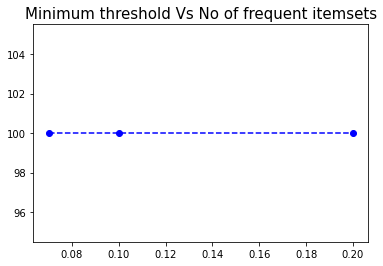

In [54]:
plt.plot(minimum_threshold,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('Minimum threshold Vs No of frequent itemsets',fontsize=15)
plt.show()

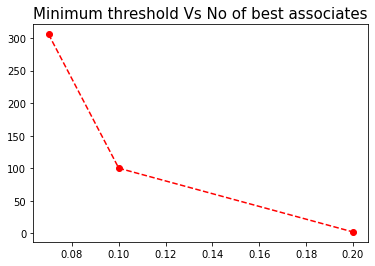

In [55]:
plt.plot(minimum_threshold,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Minimum threshold Vs No of best associates',fontsize=15)
plt.show()

##### As we change the metric as 'support' and increase the threshold from 0.07 to 0.2,

* There is no changes in No. of Itemsets
* No. of best associates decreases

### Summary

* As minimum support increases from 0.03 till 0.1, No. of Itemsets and also No. of best associates decreases

* As maximum length decreases from 5 till 2, No. of Itemsets and also No. of best associates decreases

* As Minimum length for the metric 'confidence' decreases from 0.8 till 0.6,
        * There is no changes in No. of Itemsets
        * No. of best associates increases

* As we change the metric as 'support' and increase the threshold from 0.07 to 0.2,
        * There is no changes in No. of Itemsets
        * No. of best associates decreases

### End  !!!